In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import multivariant_analysis, load_csv


FILENAME = "drug_age.csv"
filepath = f"../data/{FILENAME}"

In [31]:
drug_age_df = load_csv(filepath)

In [32]:
drug_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        328 non-null    object 
 1   time                                       328 non-null    int64  
 2   start_time                                 328 non-null    object 
 3   end_time                                   328 non-null    object 
 4   setting                                    328 non-null    object 
 5   all drugs                                  328 non-null    float64
 6   all opioids                                328 non-null    float64
 7   stimulants                                 328 non-null    float64
 8   cannabis                                   328 non-null    float64
 9   benzodiazepine                             328 non-null    float64
 10  all drugs and co-occurring

In [33]:
drug_age_df.describe()

time   all drugs  all opioids  stimulants    cannabis  \
count  328.000000  328.000000   328.000000  328.000000  328.000000   
mean    21.000000   27.835857     2.635888    1.908070    2.140649   
std     11.850238   14.412608     1.991729    1.668125    1.852785   
min      1.000000    2.660110     0.007260    0.008384    0.074513   
25%     11.000000   21.073466     1.120653    0.588082    0.547366   
50%     21.000000   27.955224     2.390254    1.244047    1.345255   
75%     31.000000   39.937962     3.870466    3.148604    3.327382   
max     41.000000   49.016364     7.619821    6.478482    6.688898   

       benzodiazepine  all drugs and co-occurring disorders  \
count      328.000000                            328.000000   
mean         0.498099                             11.480442   
std          0.450183                              7.546562   
min          0.000000                              0.817236   
25%          0.125882                              5.048420   
50%          0.350772                              9.635184   
75%          0.840176                             17.282167   
max          1.850995                             27.534148   

       all opioids and co-occurring disorders  \
count                              328.000000   
mean                                17.578430   
std                                 12.466559   
min                                  0.000000   
25%                                  5.803543   
50%                                 18.388303   
75%                                 27.707084   
max                                 41.025641   

       stimulants and co-occurring disorders  \
count                             328.000000   
mean                               22.762641   
std                                14.851177   
min                                 0.000000   
25%                                 9.758364   
50%                                25.777223   
75%                                33.846530   
max                                55.882353   

       cannabis and co-occurring disorders  ...  all drugs and covid-19  \
count                           328.000000  ...              328.000000   
mean                             22.615774  ...                4.410846   
std                              10.950949  ...                3.502058   
min                               0.000000  ...                0.000000   
25%                              14.755055  ...                2.103971   
50%                              20.696457  ...                3.946424   
75%                              31.953979  ...                5.675015   
max                              46.096654  ...               20.435763   

       all opioids and covid-19  stimulants and covid-19  \
count                328.000000               328.000000   
mean                   2.682395                 2.195466   
std                    3.071238                 2.973112   
min                    0.000000                 0.000000   
25%                    0.301354                 0.000000   
50%                    1.875838                 1.417692   
75%                    3.950805                 3.186407   
max                   20.376176                25.153374   

       cannabis and covid-19  benzodiazepine and covid-19  \
count             328.000000                   328.000000   
mean                2.571670                     1.951378   
std                 2.857744                     3.227976   
min                 0.000000                     0.000000   
25%                 0.400045                     0.000000   
50%                 2.066431                     0.000000   
75%                 3.500650                     2.816901   
max                19.402985                    20.000000   

       all opioids overdose  stimulants overdose  cannabis overdose  \
count            328.000000           328.000000         328.000000   
mean              27.713324   

/Users/I523193/dev/masters/AAI_500_Stats/usd_500_501_final/src/helpers.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=var,data=df,hue=hue,ax=axs[i])
/Users/I523193/dev/masters/AAI_500_Stats/usd_500_501_final/src/helpers.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=var,data=df,hue=hue,ax=axs[i])
/Users/I523193/dev/masters/AAI_500_Stats/usd_500_501_final/src/helpers.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=var,data=df,hue=hue,ax=axs[i])
/Users/I523193/dev/masters/AAI_500_Stats/usd_500_501_final/src/helpers.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=var,data=df,hue=hue,ax=axs[i])


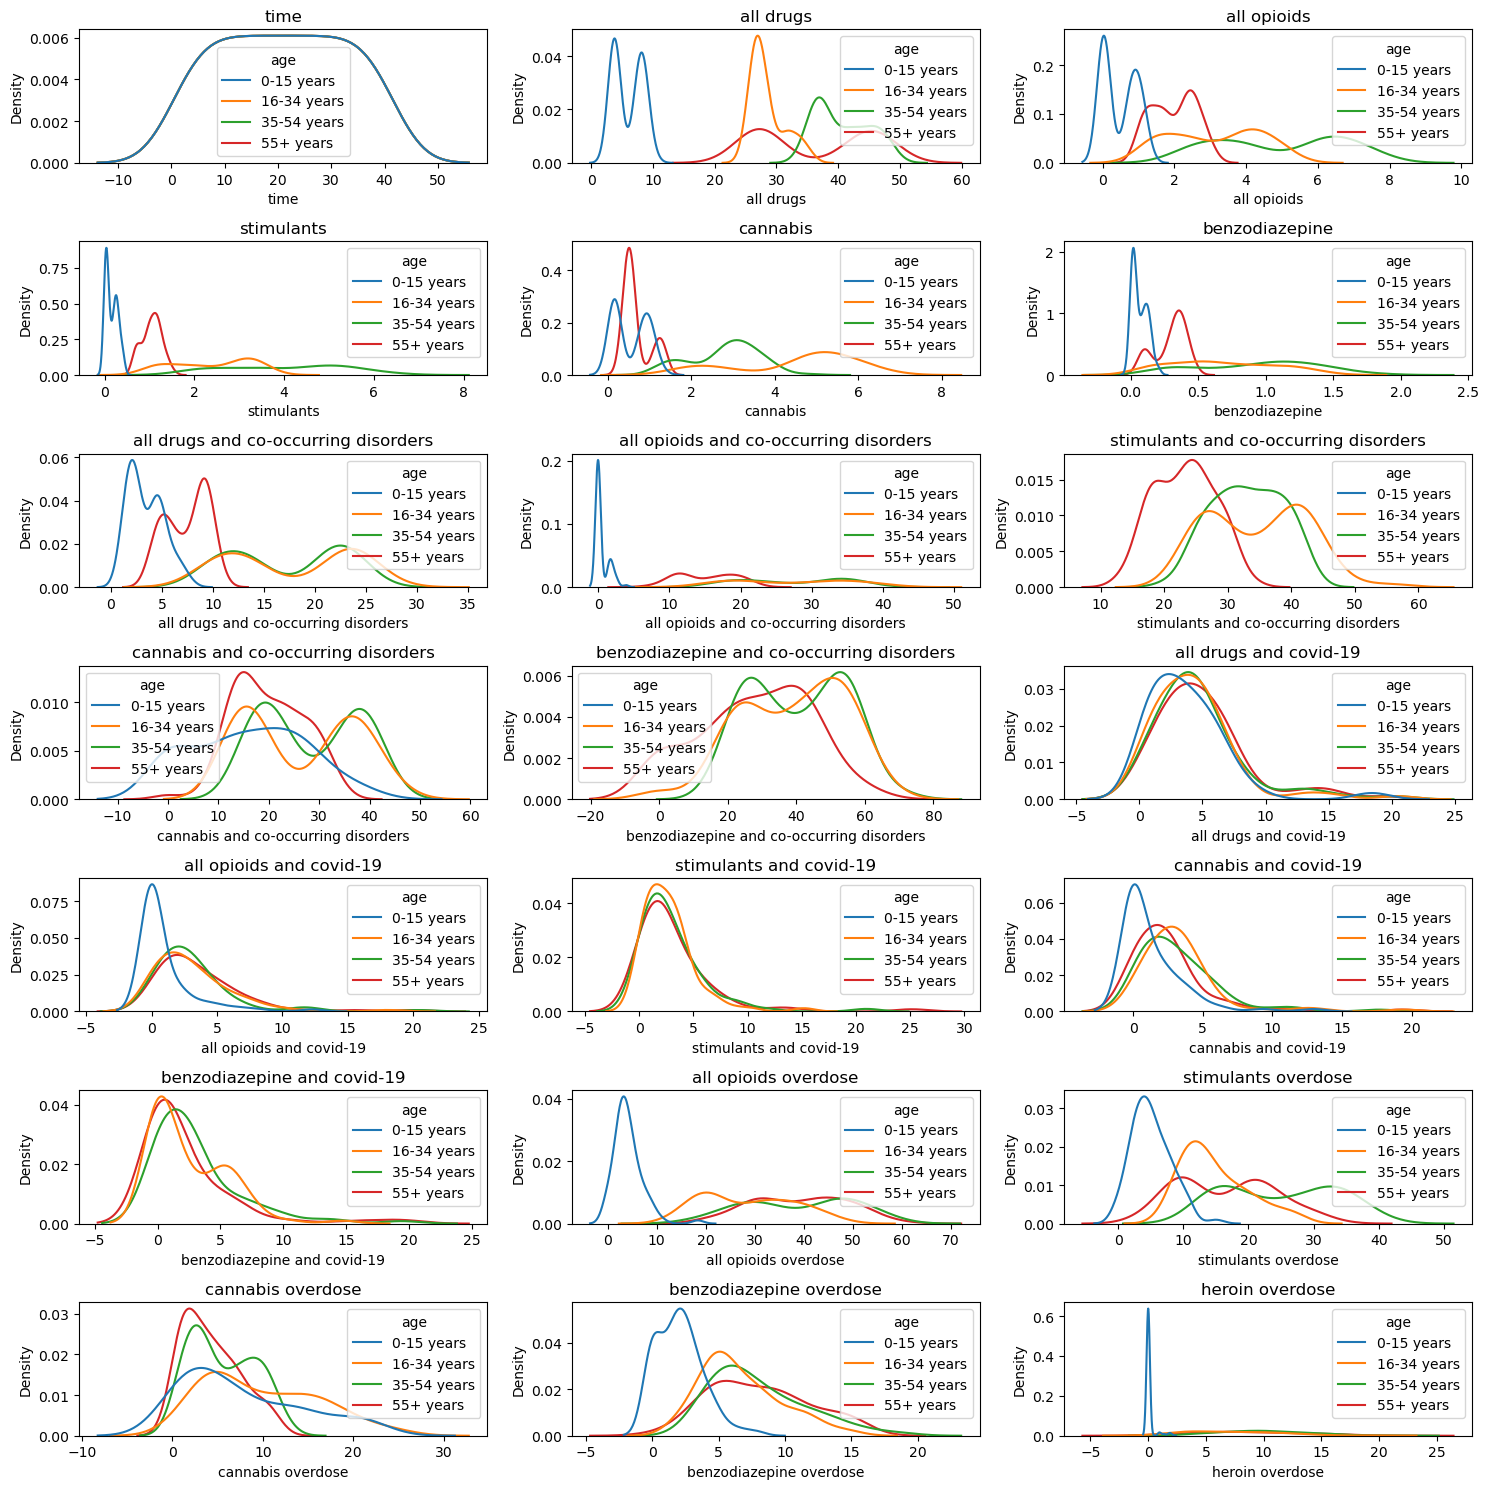

In [34]:
multivariant_analysis(drug_age_df, 'age', 'kde')

all drugs


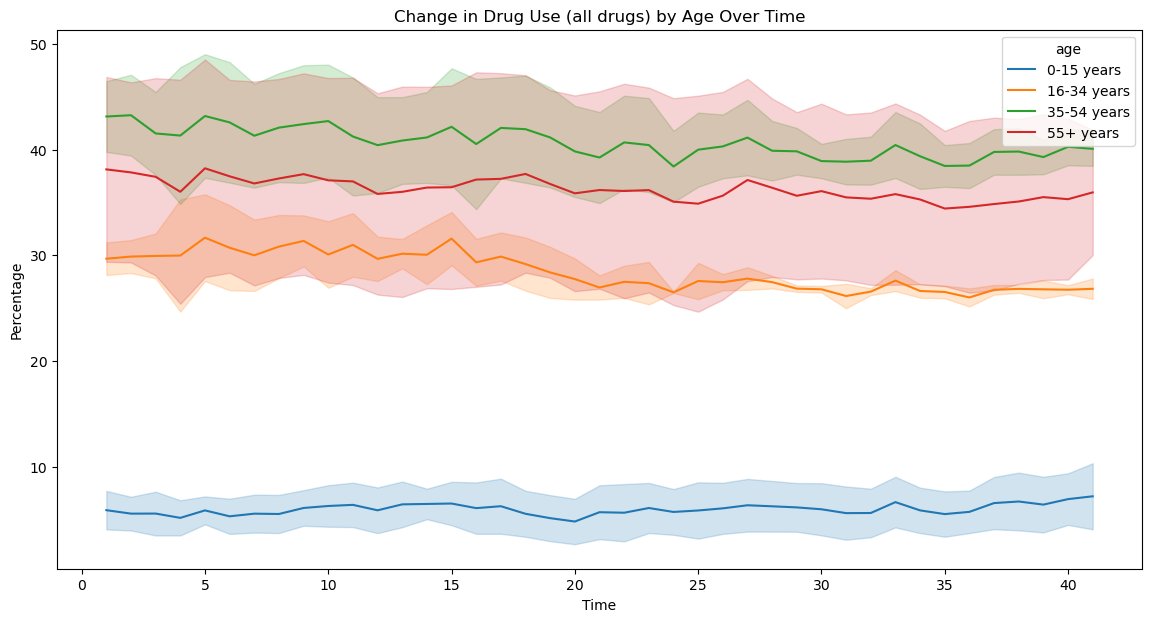

all opioids


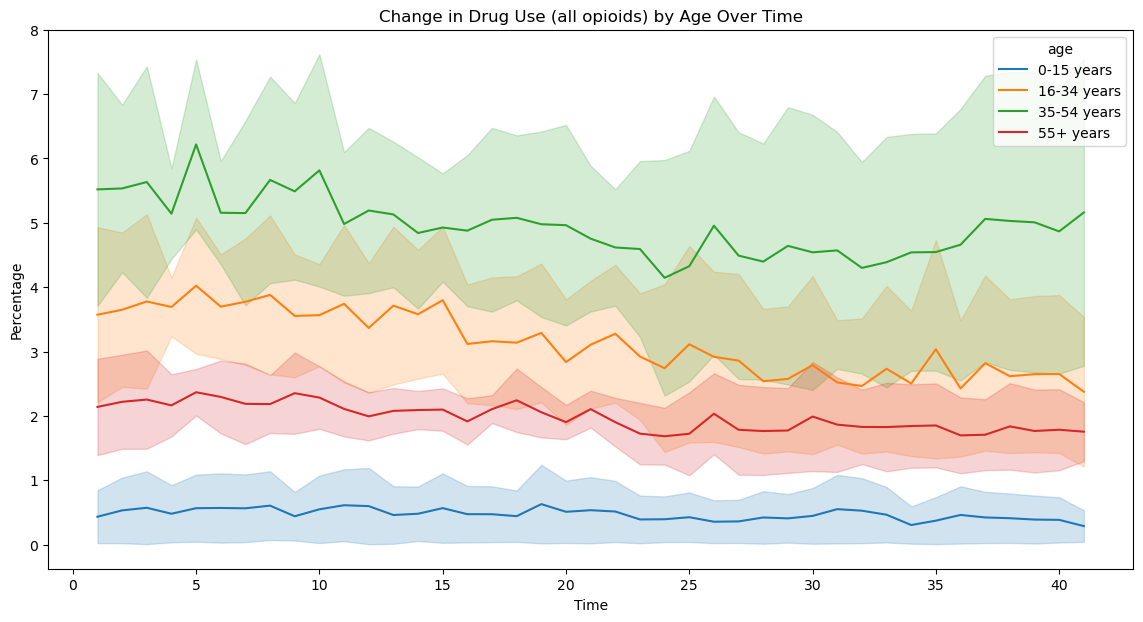

stimulants


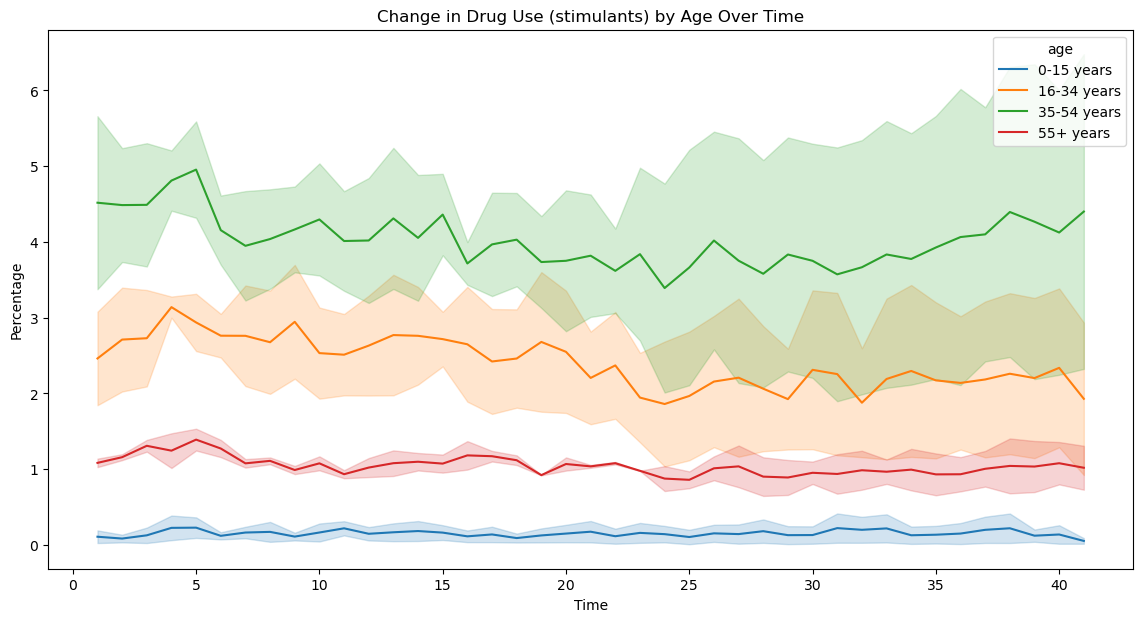

cannabis


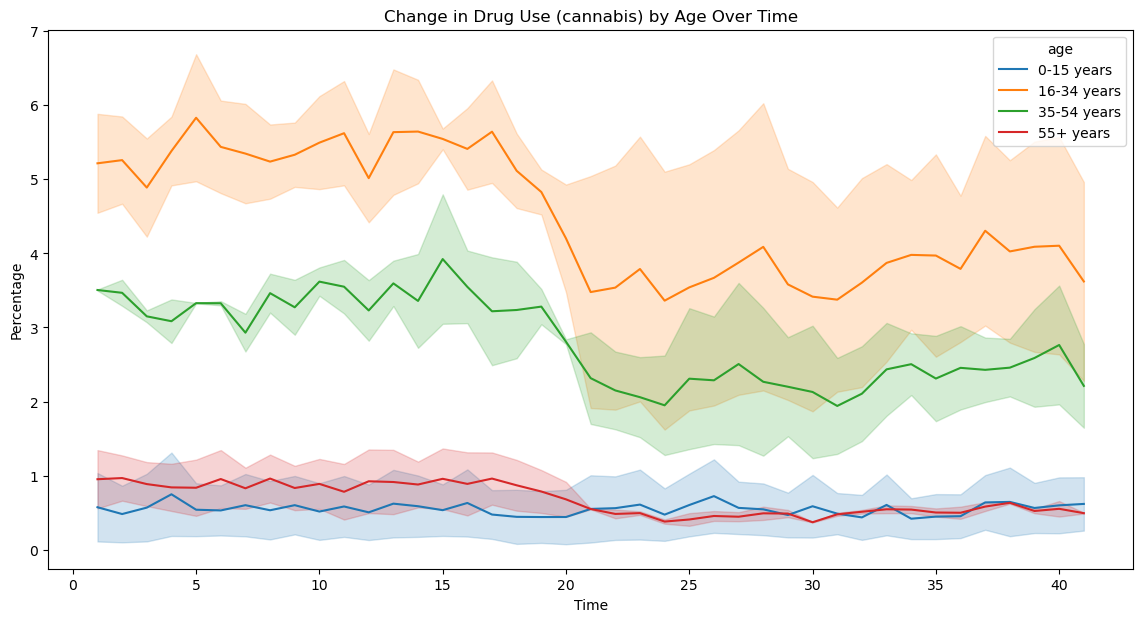

benzodiazepine


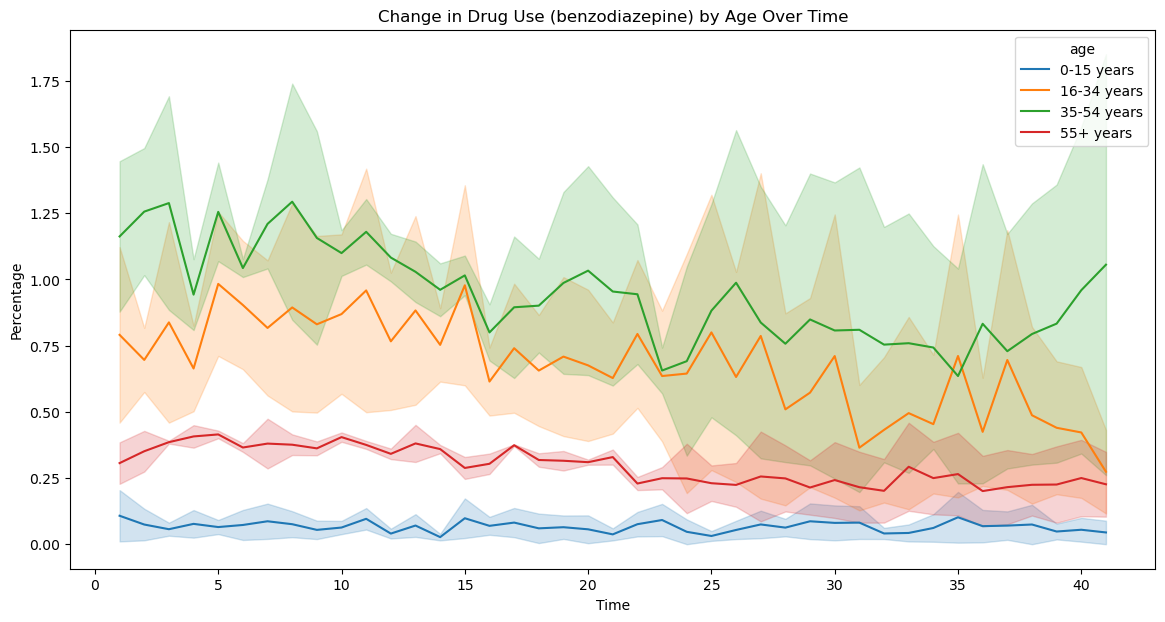

all drugs and co-occurring disorders


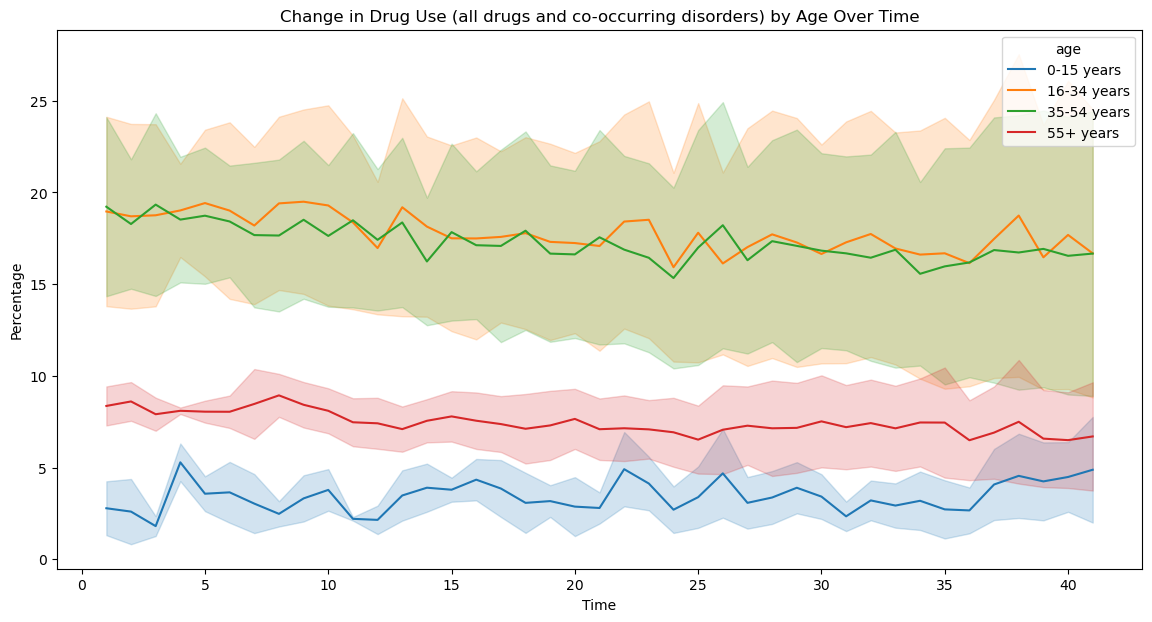

all opioids and co-occurring disorders


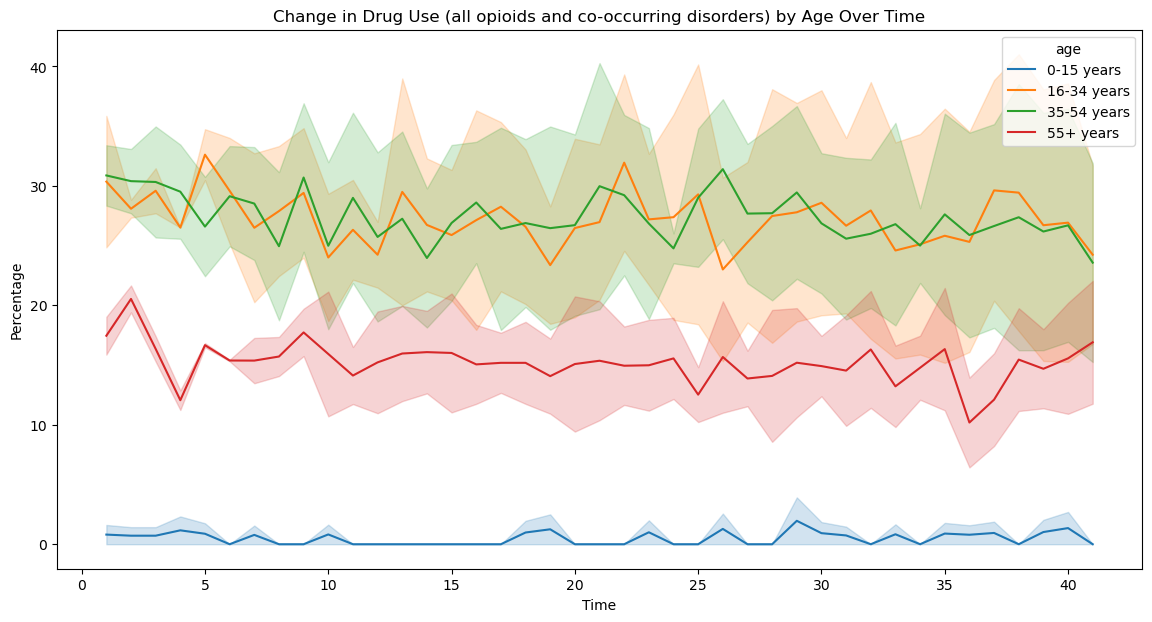

stimulants and co-occurring disorders


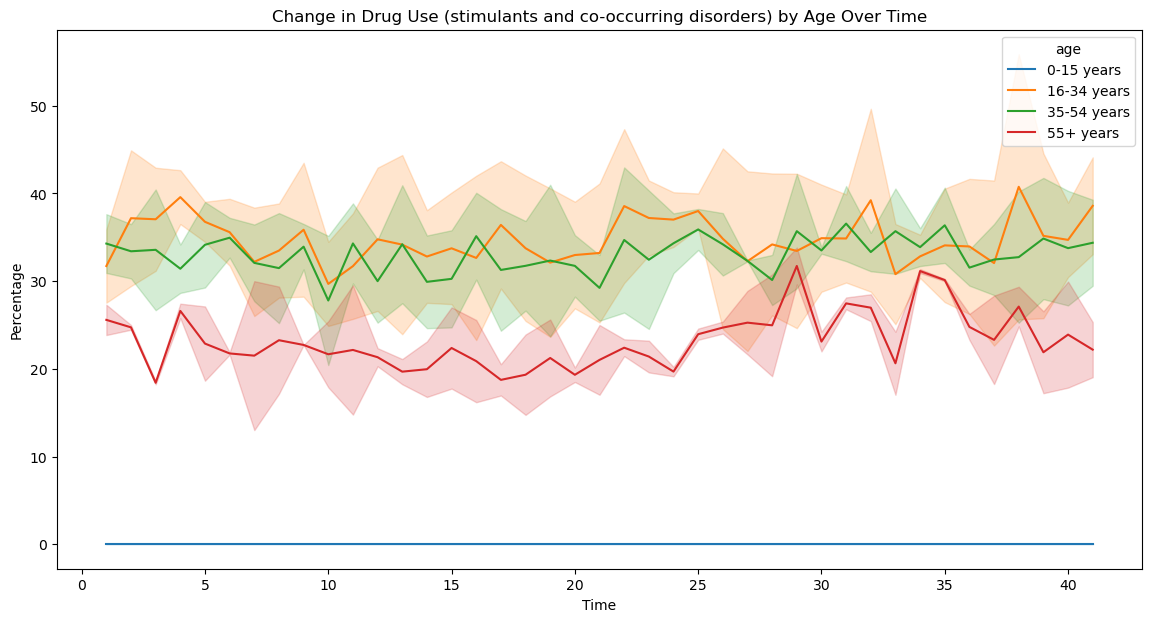

cannabis and co-occurring disorders


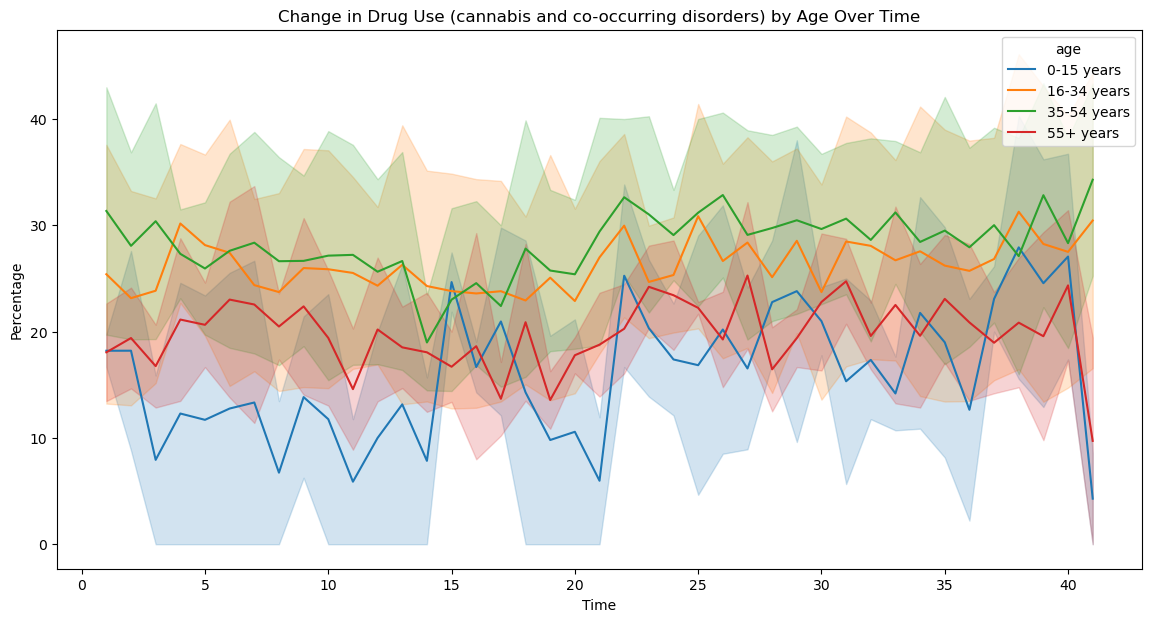

benzodiazepine and co-occurring disorders


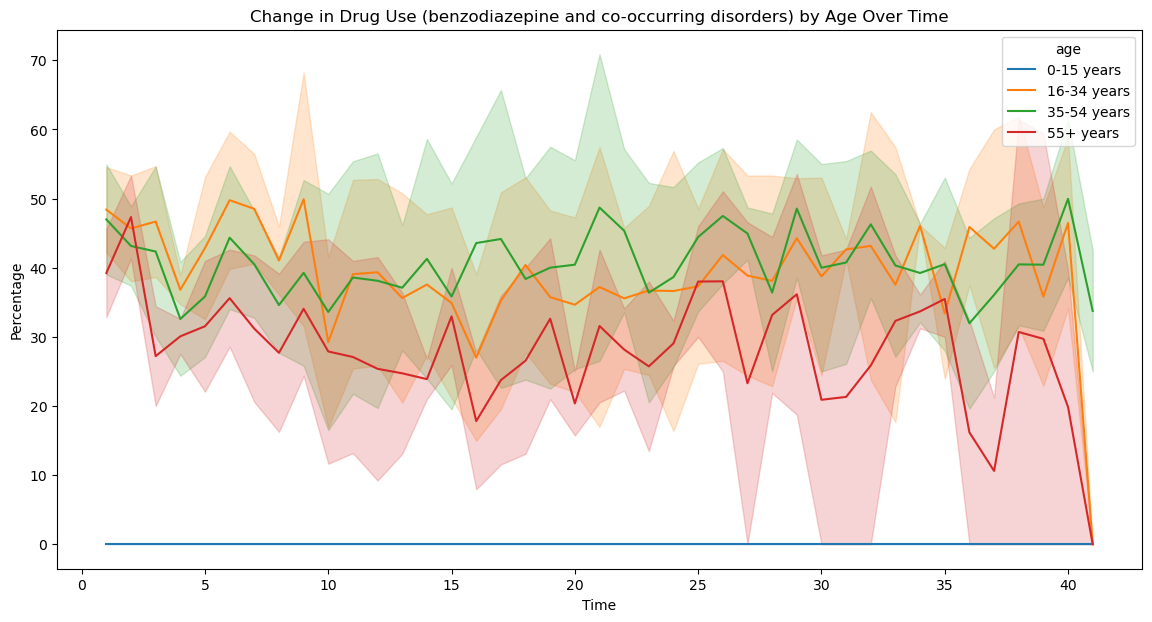

all drugs and covid-19


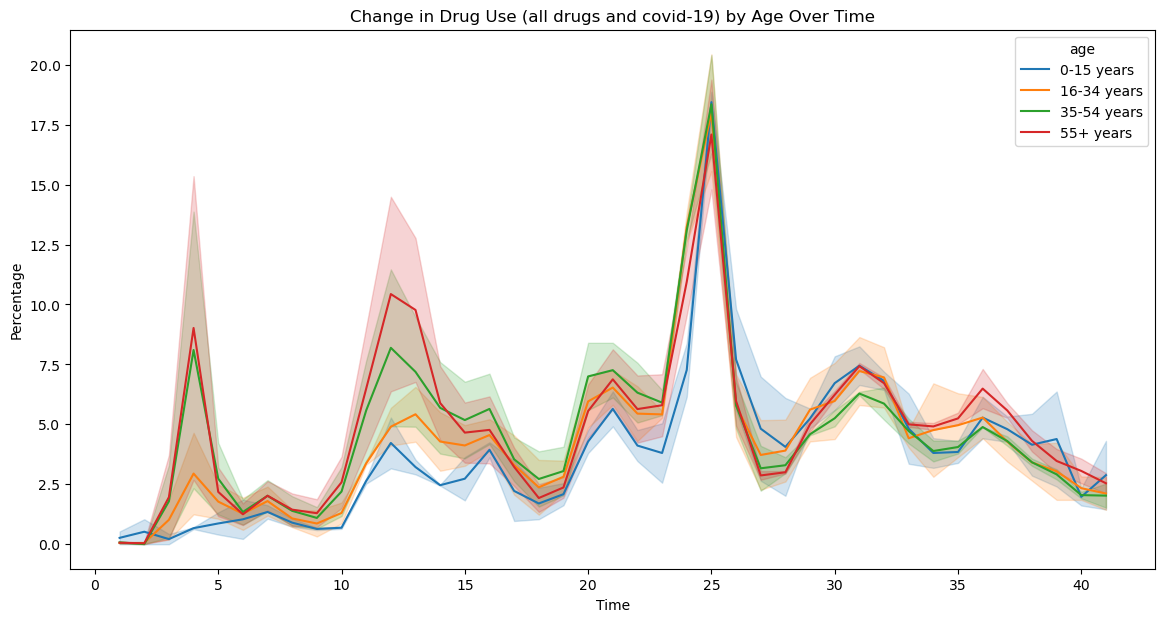

all opioids and covid-19


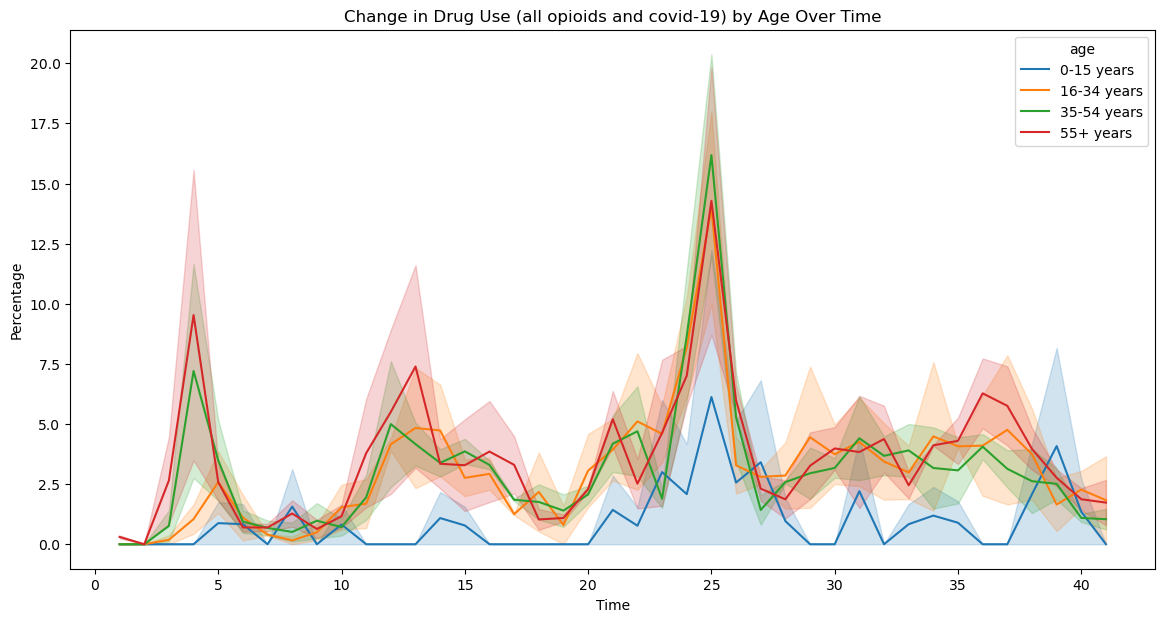

stimulants and covid-19


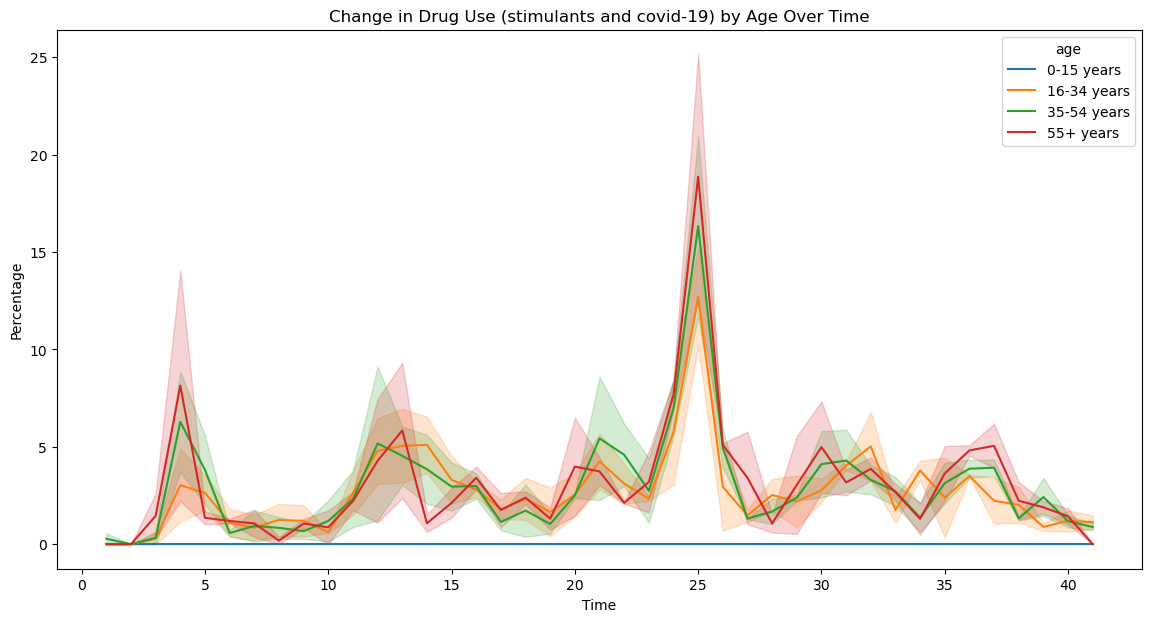

cannabis and covid-19


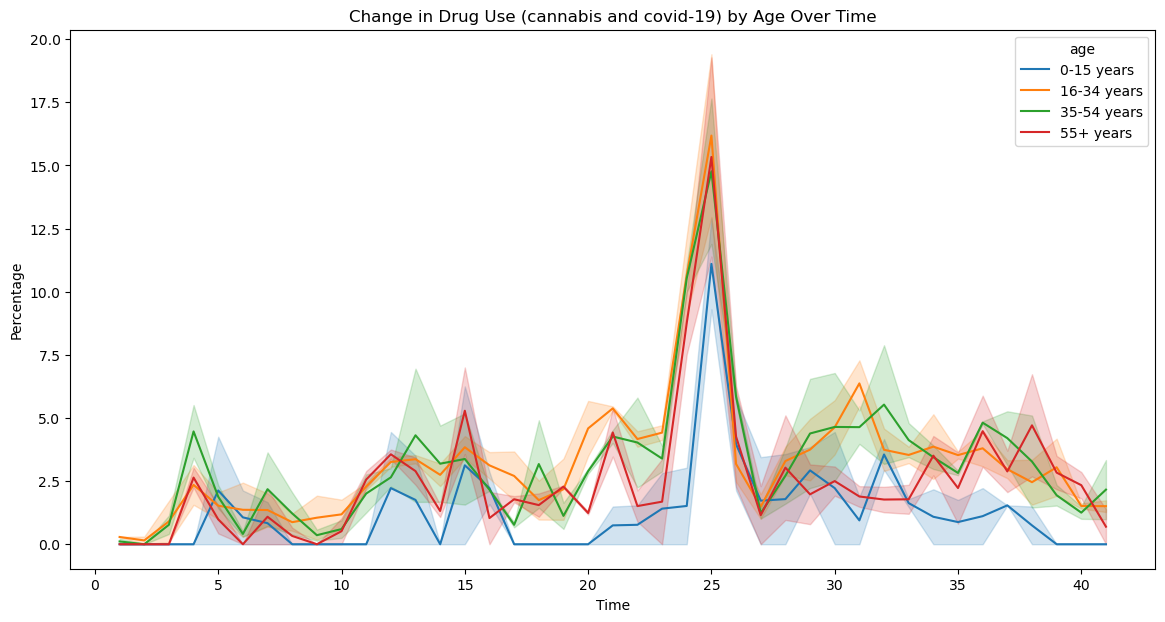

benzodiazepine and covid-19


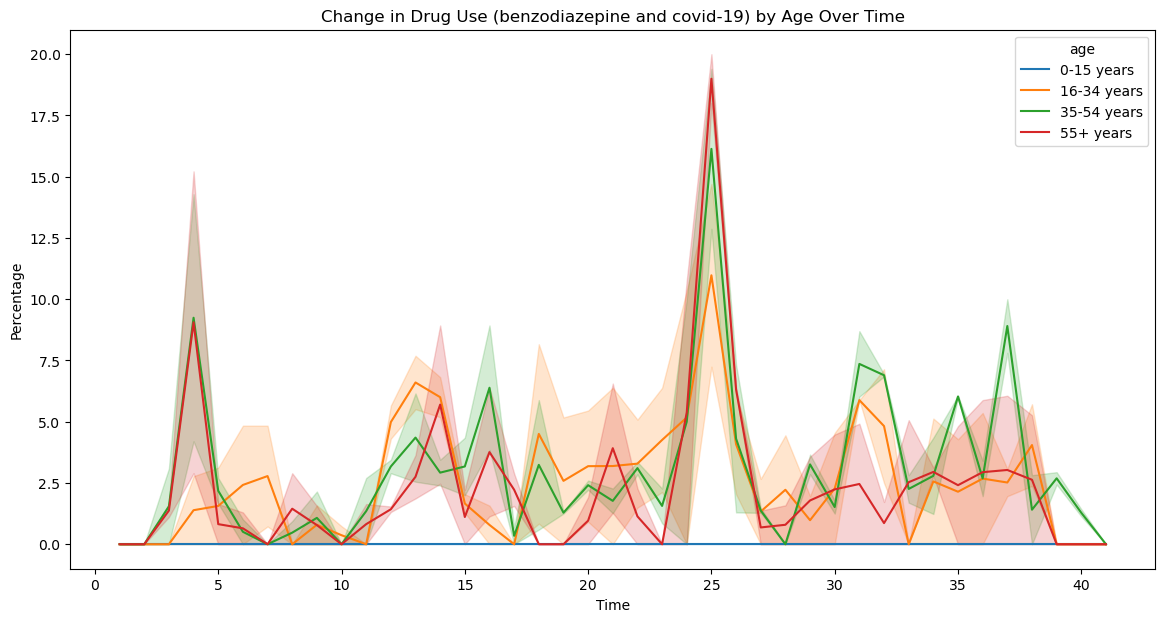

all opioids overdose


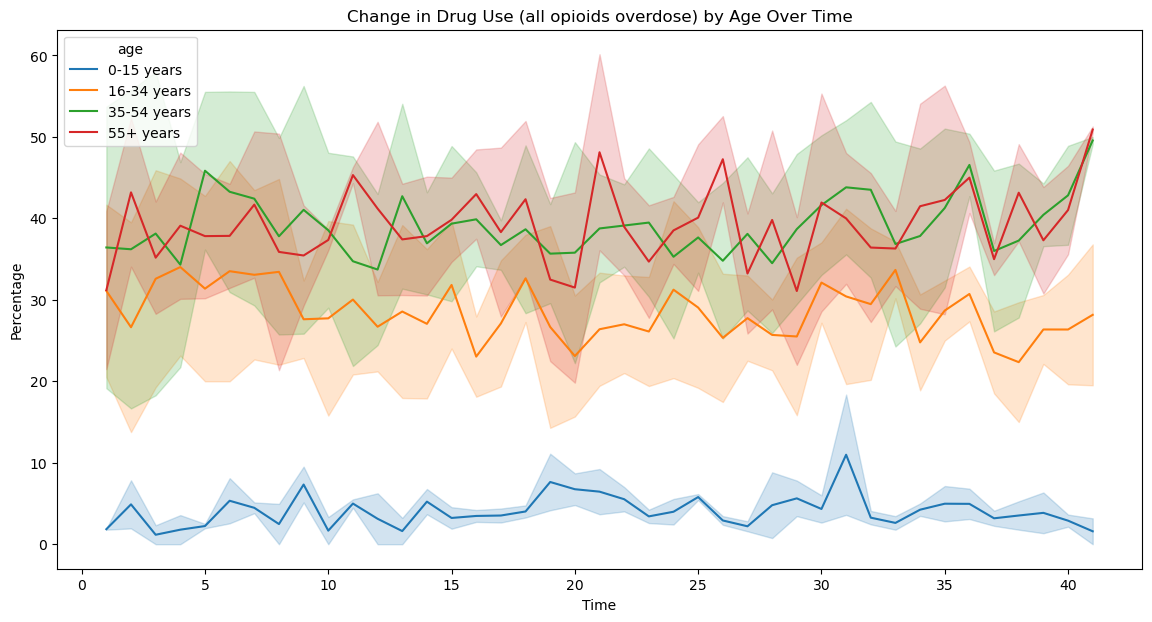

stimulants overdose


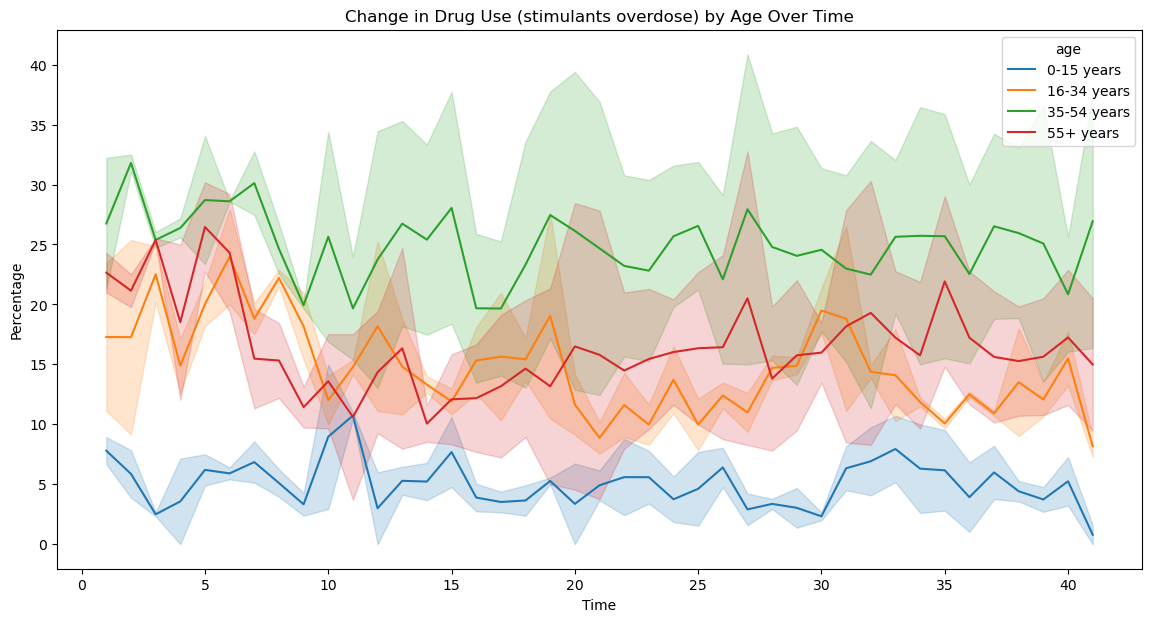

cannabis overdose


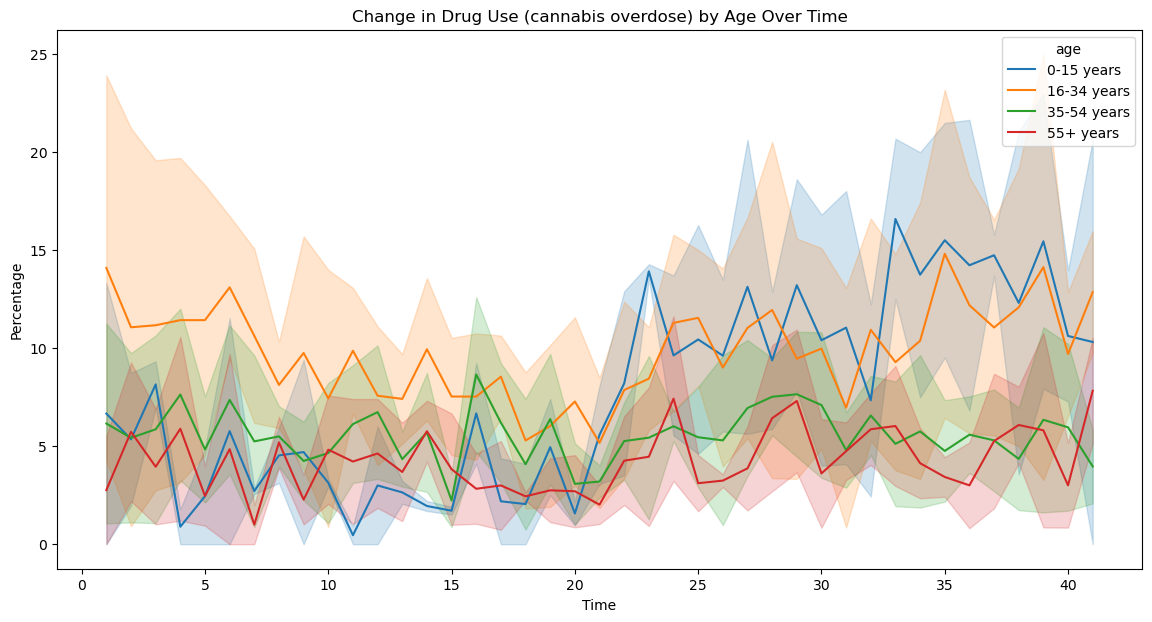

benzodiazepine overdose


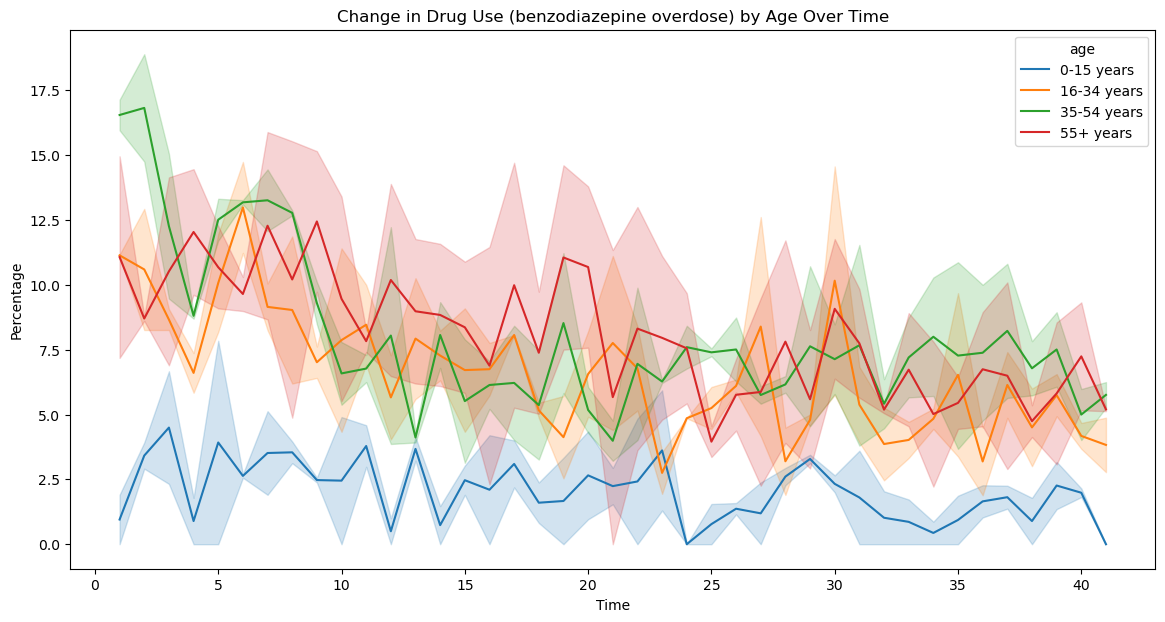

heroin overdose


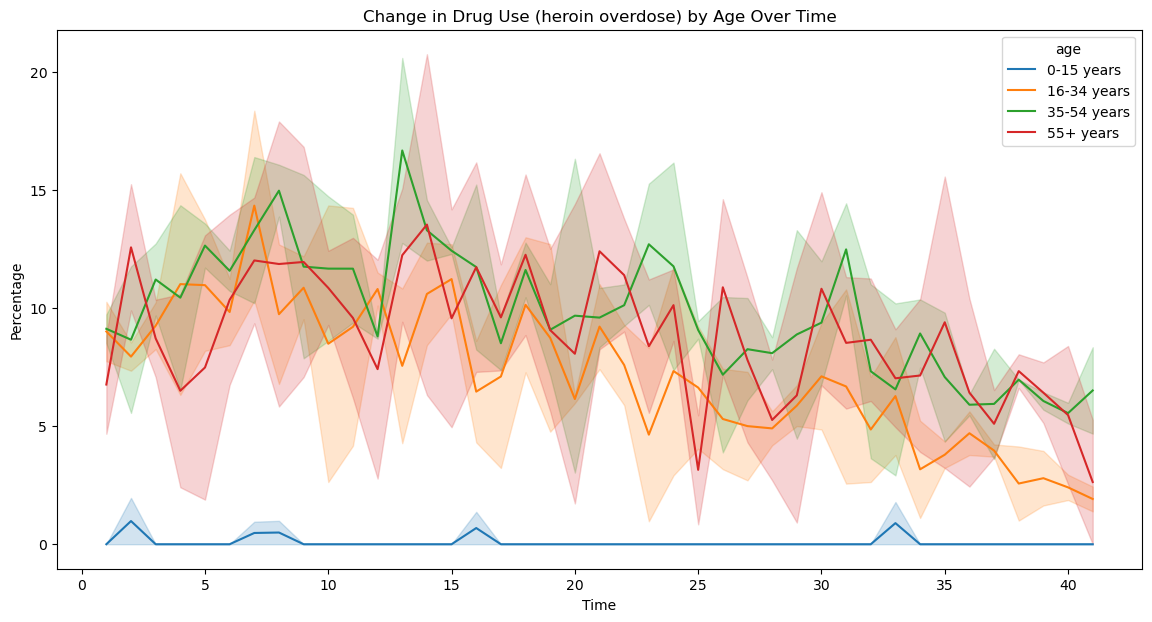

In [37]:
info_columns_to_exclude = ['age', 'setting', 'time', 'start_time', 'end_time']
for col in drug_age_df.columns:
    if col not in info_columns_to_exclude:
        print(col)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=drug_age_df, x='time', y=col, hue='age')
        title = f"Change in Drug Use ({col}) by Age Over Time"
        plt.title(title)
        plt.ylabel('Percentage')
        plt.xlabel('Time')
        plt.show()